<a href="https://colab.research.google.com/github/WMinerva292/WMinerva292/blob/main/K_Nearest_Neigbors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Importing of Libraries**

Configuration

In [4]:
import warnings
warnings.filterwarnings("ignore")

Classical Libraries

In [5]:
import numpy as np
import pandas as pd

Machine Learning Libraries

In [6]:
from sklearn.metrics import *
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score

## **Data Loading**

In [27]:
df = pd.read_csv("/diabetes.csv")

In [28]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Feature Division and Split

In [29]:
# Features
X = df.drop("Outcome", axis = 1)

# Target
y = df["Outcome"]

In [30]:
def knn_cv(x, y, K_values, cv = 5):
  #Starting with no best value for k
  best_k = None
  #Initializing the best accuracy
  best_accuracy = 0.0
  #Storing the accuracy score
  accuracy_score = {}

  for k in (K_values):
    knn = KNeighborsClassifier(n_neighbors = k)
    scores = cross_val_score(knn, x, y, cv = cv)
    mean_acc = np.mean(scores)

    accuracy_score[k] = mean_acc
    if mean_acc > best_accuracy:
      best_k = k
      best_accuracy = mean_acc

      return {"best_k" : best_k, "accuracy_score" : accuracy_score}


In [31]:
k_values = range(1,12)

In [32]:
knn_cv(X, y, k_values, cv = 5)

{'best_k': 1, 'accuracy_score': {1: 0.662821492233257}}

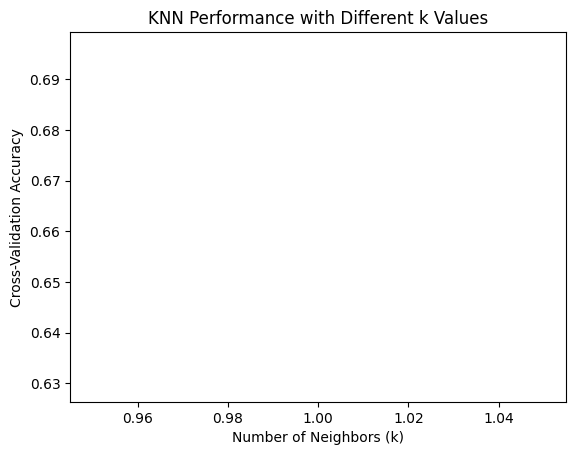

In [33]:
import matplotlib.pyplot as plt

results = knn_cv(X, y, k_values, cv=5)

accuracy_scores = results['accuracy_score']

plt.plot(accuracy_scores.keys(), accuracy_scores.values())
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Cross-Validation Accuracy')
plt.title('KNN Performance with Different k Values')
plt.show()

Model Manual

In [17]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

In [18]:
model = KNeighborsClassifier(n_neighbors = 8)

In [19]:
model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=8)

In [20]:
pred = model.predict(x_test)

In [21]:
print(f"Accuracy Score: {accuracy_score(y_test, pred)}")

Accuracy Score: 0.7142857142857143


In [22]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': np.arange(1, 21)}


knn = KNeighborsClassifier()


grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='accuracy')


grid_search.fit(X, y)


print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)


best_knn = grid_search.best_estimator_


y_pred = best_knn.predict(x_test)


accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Best parameters: {'n_neighbors': 14}
Best score: 0.7578558696205755
Accuracy: 0.7575757575757576
